In [47]:
%matplotlib inline

from ancestrator import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product
from os.path import join

Saved at -> /home/juan/tesina/charts/PCAs/LEA__GAL_Completo__vs__GAL_Affy__SmartPCA.png


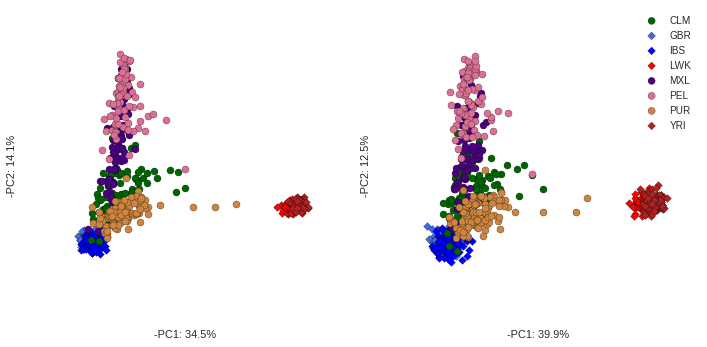

In [45]:
sns.set_context('notebook')
sns.set_style('white')

panel_labels = ['GAL_Completo', 'GAL_Affy']
samplegroup_labels = ['LEA']
source_labels = ['1000Genomes']
components = [['PC1', 'PC2']]
implementations = ['smartpca']

combos = list(product(source_labels, samplegroup_labels, panel_labels, components))


for implementation in implementations:    
    plotw, ploth = 5, 5
    ncols, nrows = len(list(combos)), 1
    fig = plt.figure(figsize=(ncols * plotw, nrows * ploth))
    ax_ids = list(np.arange(ncols * nrows) + 1)
    
    for s, sg, p, components in combos:
        dataset = Dataset(s, sg, p)
        smartpca = dataset.pca(implementation=implementation)
        ax = smartpca.plot(ax=fig.add_subplot(nrows, ncols, ax_ids.pop(0)),
                           components_to_plot=components)
        if dataset.panel.label == 'GAL_Completo':
            ax.legend_.set_visible(False)
    
    sns.despine(left=True, bottom=True)
    plt.tight_layout()  
    smartpca.savefig(filename='/home/juan/tesina/charts/PCAs/LEA__GAL_Completo__vs__GAL_Affy__SmartPCA')
    plt.show()

Saved at -> /home/juan/tesina/1000Genomes/plots/LEA__GAL_Affy_SubPanels__SmartPCA.png


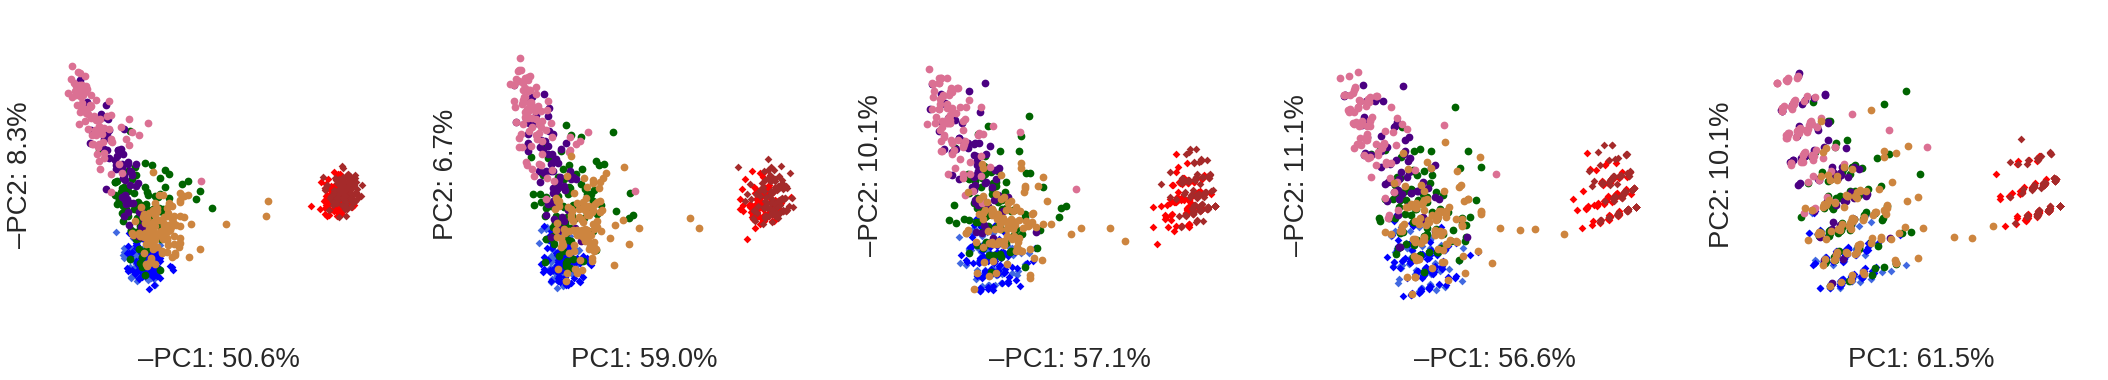

In [10]:
sns.set_context('notebook', font_scale=2.5)
sns.set_style('white')

panel_labels = ['100_SNPs_from_GAL_Affy', '50_SNPs_from_GAL_Affy',
                '25_SNPs_from_GAL_Affy', '20_SNPs_from_GAL_Affy',
                '15_SNPs_from_GAL_Affy']
samplegroup_labels = ['LEA']
source_labels = ['1000Genomes']
components = [['PC1', 'PC2']]
implementations = ['smartpca']

combos = list(product(source_labels, samplegroup_labels, panel_labels, components))


for implementation in implementations:
    plotw, ploth = 6, 6
    nrows = 1
    ncols = len(list(combos))/nrows
    fig = plt.figure(figsize=(ncols * plotw, nrows * ploth))
    ax_ids = list(np.arange(ncols * nrows) + 1)
    
    for s, sg, p, components in combos:
        dataset = Dataset(s, sg, p)
        smartpca = dataset.pca(implementation=implementation)
        ax = fig.add_subplot(nrows, ncols, ax_ids.pop(0))
        smartpca.plot(ax=ax, components_to_plot=components)
        ax.legend_.set_visible(False)
        
    sns.despine(left=True, bottom=True)
    plt.tight_layout()  
    smartpca.savefig(filename='LEA__GAL_Affy_SubPanels__SmartPCA')
    plt.show()

GAL_Completo · 445 SNPs
Latinoamericanos, Europeos, Africanos, Chinos, Indios
Saved at -> /home/juan/tesina/charts/PCAs/LEACI__GAL_Completo__12_PCs__SmartPCA.png


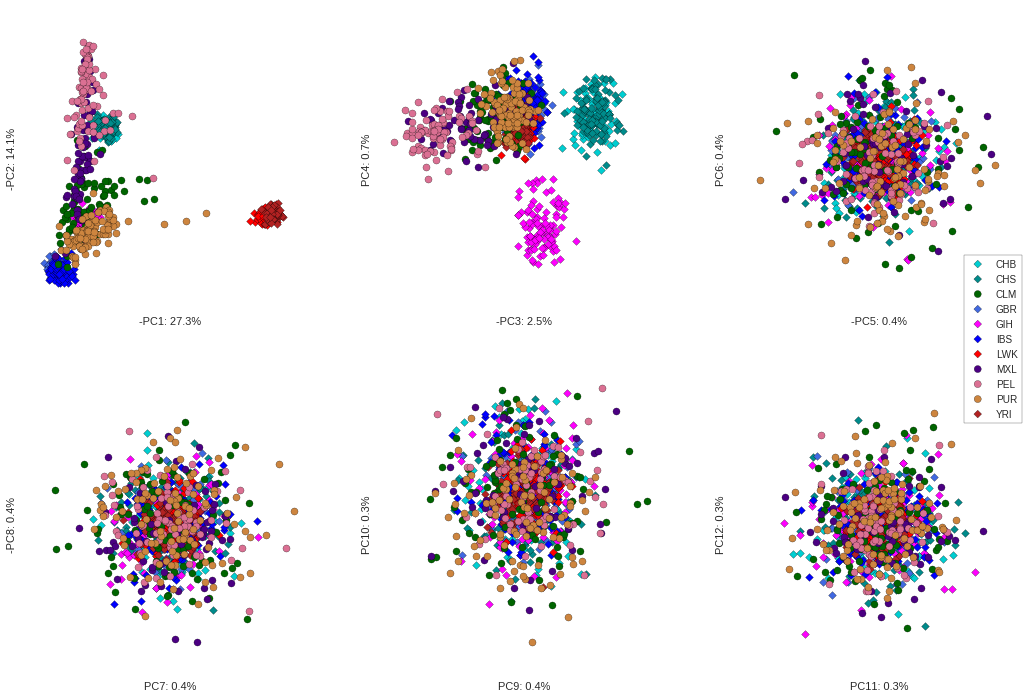

CPx100 · 43,144 SNPs
Latinoamericanos, Europeos, Africanos, Chinos, Indios
Saved at -> /home/juan/tesina/charts/PCAs/LEACI__CPx100__12_PCs__SmartPCA.png


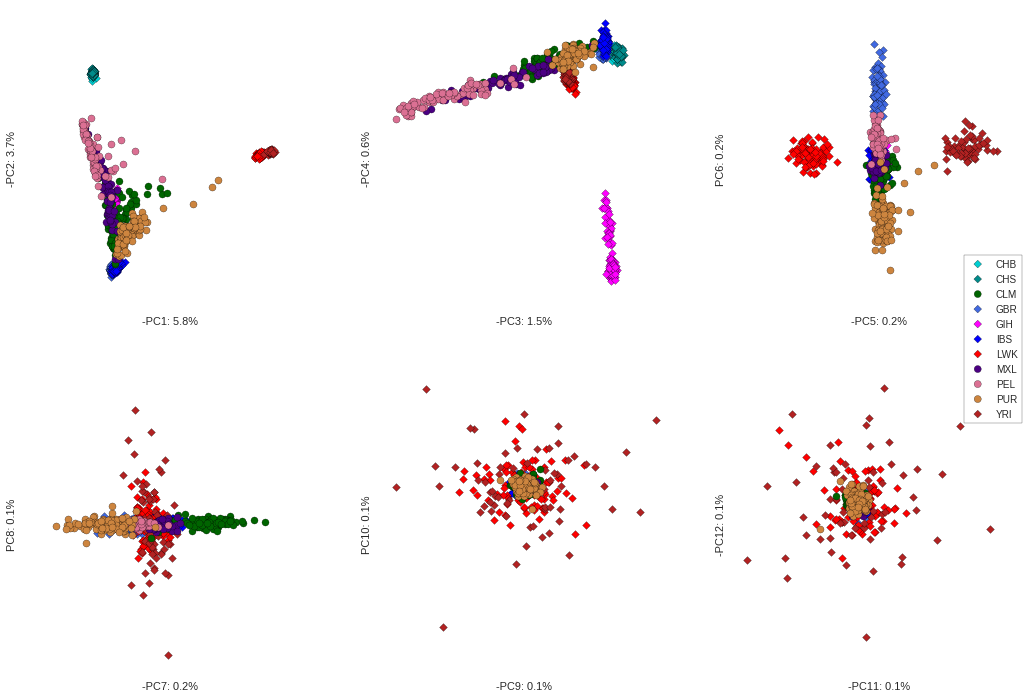

In [48]:
def make_filename(samplegroup_label, panel_label, components_to_compare):
    return "{}__{}__{}_PCs__SmartPCA".format(samplegroup_label, panel_label,
                                             len(components_to_compare) * 2)

sns.set_context("notebook")
sns.set_style("white")

samplegroups = ["LEACI"]
panels = ["GAL_Completo", "CPx100"]
# samplegroups = ["L"]
# panels = ["GAL_Completo", "CPx1"]
components = [["PC1", "PC2"], ["PC3", "PC4"], ["PC5", "PC6"],
              ["PC7", "PC8"], ["PC9", "PC10"], ["PC11", "PC12"]]

for samplegroup, panel in product(samplegroups, panels):
    
    dataset = Dataset('1000Genomes', samplegroup, panel)
    caption = "{}\n{}".format(dataset.panel.name, dataset.samplegroup.name)
    filename = make_filename(dataset.samplegroup.label,
                             dataset.panel.label, components)
    print(caption)
    pca = dataset.pca('smartpca')
    plotw, ploth = 6, 6
    nrows = 2
    ncols = len(components)/nrows
    fig = plt.figure(figsize=(plotw * ncols, ploth * nrows))
    ax_ids = list(np.arange(len(components)) + 1)
    
    for components_pair in components:
        ax = fig.add_subplot(nrows, ncols, ax_ids.pop(0))
        pca.plot(ax, components_pair)
        if components_pair == components[-1]:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, frameon=True, bbox_to_anchor=(1, 1.4))
        else:
            ax.legend_.set_visible(False)

    pca.savefig(join('/home/juan/tesina/charts/PCAs/', filename))
    plt.show()

## Intersection of MaxPlank's ALL.Affy500 and 1000Genomes' CPx100

In [ ]:
# Tomar los SNPs comunes: intersección de CPx100 y Affy500. Definir un nuevo Panel Common3k
affy500 = Panel('Affy500')
cpxxx = Panel('CPx100')

common_snps_index = affy500.snps.index.intersection(cpxxx.snps.index)
common_snps = affy500.snps.ix[common_snps_index]
Panel.write_bim(common_snps, 'Common4k')

# Crear ALL.Common4k para MaxPlank y para 1000Genomes
common4k = Panel('Common4k')
mp_all = Dataset('MaxPlank', 'ALL', 'Affy500')
# Plink(mp.bedfile).extract(common4k.snps_file)
mp_all.extract_subdataset_from_panel(common4k)

cpxxx = Dataset('1000Genomes', 'ALL', 'CPx100')
cpxxx.extract_subdataset_from_panel(common4k)

# Decidir qué muestras quiero de MaxPlank.ALL y definir un SampleGroup AMR
SampleGroup.new_samplegroup('MaxPlank', ['AMR'], 'AMR')

In [119]:
# Concatenar los datasets MaxPlank.AMR.Common3k.genotypes() y
# 1000Genomes.LEA.Common3k.genotypes()

common4k_amr = Dataset('MaxPlank', 'AMR', 'Common4k')
common4k_lea = Dataset('1000Genomes', 'LEA', 'Common4k')

common4k_merged = pd.concat([common4k_amr.genotypes(), common4k_lea.genotypes()])
merged_dataset = common4k_merged

In [113]:
SampleGroup.new_samplegroup('MaxPlank', ['AMR', 'EUR', 'AFR'], 'LEA')
common4k_lea_mp = Dataset('MaxPlank', 'LEA', 'Common4k')
common4k_lea_kg = Dataset('1000Genomes', 'LEA', 'Common4k')

common4k_lea_merged = pd.concat([common4k_lea_mp.genotypes(), common4k_lea_kg.genotypes()])
merged_dataset = common4k_lea_merged

Written -> /home/juan/tesina/MaxPlank/samplegroups/LEA.fam
You can now call SampleGroup('MaxPlank', 'LEA')


In [ ]:
# Correr un PCA con el nuevo dataset

In [121]:
from analyzers.sklearn_pca import SklearnPCA
from plotters.pca_plotter import PCAPlotter

class MockDataset:
    pass

dataset = MockDataset()
dataset.genotypes = lambda: merged_dataset

pca = SklearnPCA(dataset)
pca.run()

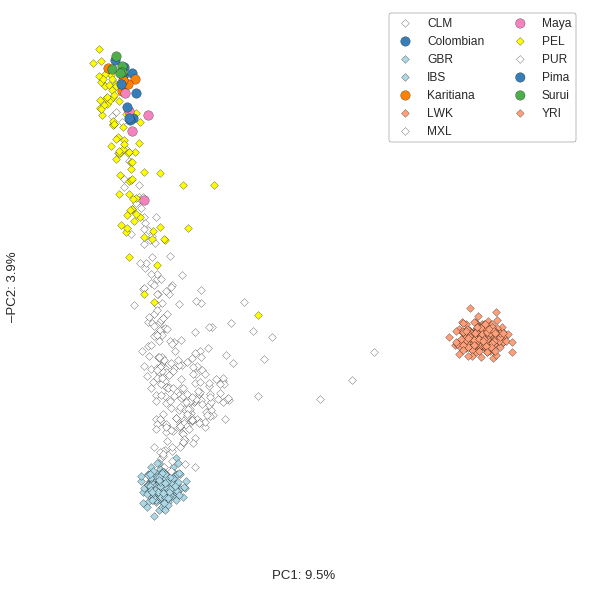

In [124]:
sns.set_context('notebook', font_scale=1.2)
sns.set_style('white')

pca_plotter = PCAPlotter(pca, '/home/juan/tesina/charts/PCAs')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
pca_plotter.draw_ax(ax, ['PC1', 'PC2'])

# handles, labels = ax.get_legend_handles_labels()
ax.legend(ncol=2, frameon=True, fancybox=True)

plt.show()

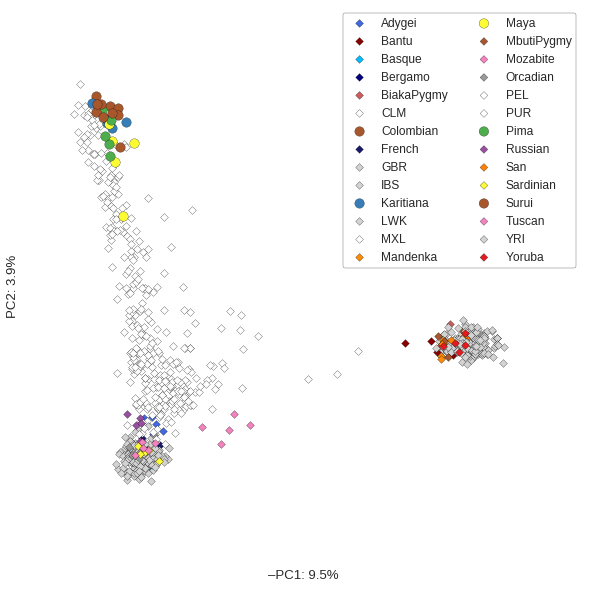

In [117]:
sns.set_context('notebook', font_scale=1.2)
sns.set_style('white')

pca_plotter = PCAPlotter(pca, '/home/juan/tesina/charts/PCAs')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
pca_plotter.draw_ax(ax, ['PC1', 'PC2'])

# handles, labels = ax.get_legend_handles_labels()
ax.legend(ncol=2, frameon=True, fancybox=True)

plt.show()

# PCA con los nuevos subpaneles balanceados

Saved at -> /home/juan/tesina/charts/PCAs/All_Balanced_SubPanels_PCAs.png


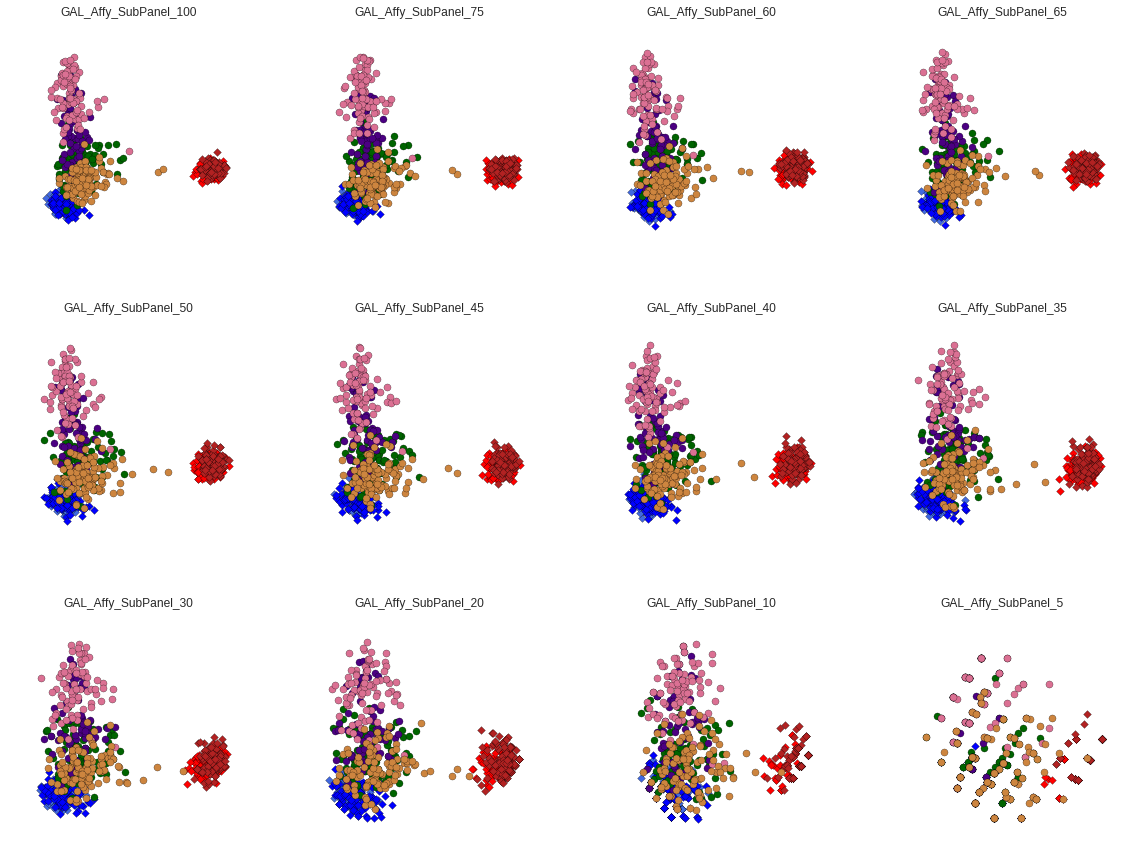

In [55]:
from itertools import product
from helpers.helpers import hide_spines_and_ticks
from math import ceil

source_labels = ['1000Genomes']
samplegroup_labels = ['LEA']
panel_labels = [
 'GAL_Affy_SubPanel_100',
 'GAL_Affy_SubPanel_75',
 'GAL_Affy_SubPanel_60',
 'GAL_Affy_SubPanel_65',
 'GAL_Affy_SubPanel_50',
 'GAL_Affy_SubPanel_45',
 'GAL_Affy_SubPanel_40',
 'GAL_Affy_SubPanel_35',
 'GAL_Affy_SubPanel_30',
 'GAL_Affy_SubPanel_20',
 'GAL_Affy_SubPanel_10',
 'GAL_Affy_SubPanel_5'
]

combo = product(source_labels, panel_labels, samplegroup_labels)

sns.set_context('notebook')
sns.set_style('white')

ncols = 4
plot_width, plot_height = 5, 5

nrows = ceil(len(panel_labels) / ncols)
ax_ids = list(np.arange(nrows * ncols) + 1)
fig = plt.figure(figsize=(ncols * plot_width, nrows * plot_height))

for source_label, panel_label, samplegroup_label in combo:
    dataset = Dataset(source_label, samplegroup_label, panel_label)
    pca = dataset.pca('smartpca')
    ax_id = ax_ids.pop(0)
    ax = fig.add_subplot(nrows, ncols, ax_id)
    pca.plot(ax=ax, rotate=True)
    
    ax.set_title(dataset.panel.label)
    ax.legend_.set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')

pca.savefig(filename='/home/juan/tesina/charts/PCAs/All_Balanced_SubPanels_PCAs')
plt.show()